# Observations:

### - Urban contributes the most Total Fare, about 62.7%
### - Urban has the largest driver number, about 80.9%
### - Rural typically has the highest average fare, while Urban relevantly has the lowest average fare.

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load 
City = pd.read_csv("data/city_data.csv")
Ride = pd.read_csv("data/ride_data.csv")

############################

rf=Ride.groupby('city')['fare'].sum()
rr=Ride.groupby('city')['ride_id'].count()
rc=Ride.groupby('city')['city'].unique()
Ride=pd.DataFrame({'city':rc,'fare':rf,'ride_id':rr} )
Ride=Ride[['fare','ride_id']]
Ride['city']=Ride.index
Ride=Ride.reset_index(drop=True)

#########################

# Read the City and Ride Data
City.head()
Ride.head()
# Combine the data into a single dataset
df = pd.merge(City, Ride, on="city")
# Display the data table for preview
df.head()

,city,driver_count,type,fare,ride_id
0,Richardfort,38,Urban,626.45,28
1,Williamsstad,59,Urban,560.33,23
2,Port Angela,67,Urban,452.90,19
3,Rodneyfort,34,Urban,658.19,23
4,West Robert,39,Urban,778.84,31


In [2]:
AvgFare=df['fare']/df['ride_id']
df['avgfare']=AvgFare
df_urban=df.loc[df['type']=='Urban', ]
df_rural=df.loc[df['type']=='Rural', ]
df_suburban=df.loc[df['type']=='Suburban', ]



In [3]:
u_fare=df_urban['fare']
u_ride=df_urban['ride_id']
u_dri=df_urban['driver_count']
r_fare=df_rural['fare']
r_ride=df_rural['ride_id']
r_dri=df_rural['driver_count']
s_fare=df_suburban['fare']
s_ride=df_suburban['ride_id']
s_dri=df_suburban['driver_count']
xu=u_ride
yu=df_urban['avgfare']
zu=u_dri
xr=r_ride
yr=df_rural['avgfare']
zr=r_dri
xs=s_ride
ys=df_suburban['avgfare']
zs=s_dri


## Bubble Plot of Ride Sharing Data

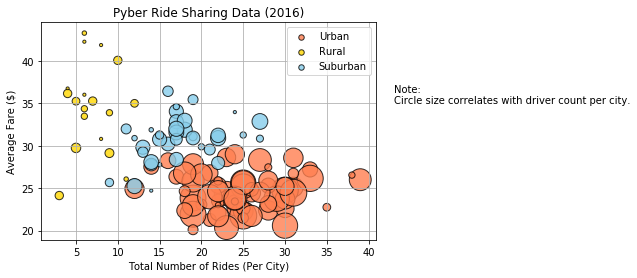

In [4]:
###### Obtain the x and y coordinates for each of the three city types
# Build the scatter plots for each city types

plt.scatter(xu, yu, s=zu*10, c="coral", alpha=0.8, marker="o", edgecolors="black", label='Urban')
plt.scatter(xr, yr, s=zr*10, c="gold", alpha=0.8, marker="o", edgecolors="black", label='Rural' )
plt.scatter(xs, ys, s=zs*10, c="skyblue", alpha=0.8, marker="o", edgecolors="black", label='Suburban')

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()
#plt.ylim(18,45)
#plt.xlim(0,45)
lgnd = plt.legend(loc="upper right", scatterpoints=1, fontsize=10)
for handle in lgnd.legendHandles:
    handle.set_sizes([30])

plt.text(43,35, ((f'Note:')+'\n'+(f'Circle size correlates with driver count per city.')))

plt.savefig("BubbleChart.png")
plt.show()


## Total Fares by City Type

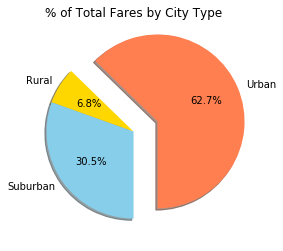

In [5]:
# Calculate Type Percents
fare_total=Ride['fare'].sum()
fare_u=(df.loc[df['type']=='Urban',['fare']].sum())
fare_r=(df.loc[df['type']=='Rural',['fare']].sum())
fare_s=(df.loc[df['type']=='Suburban',['fare']].sum())

# Build Pie Chart
x = ["Urban", "Rural", "Suburban"]
y = [float(fare_u), float(fare_r), float(fare_s)]
colors = ["coral", "gold", "skyblue"]
explode = (0.3, 0, 0)

plt.pie(y, labels=x, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=-90)
plt.title("% of Total Fares by City Type")
#plt.axis("equal")
plt.savefig("Pie_fare.png")
plt.show()


## Total Rides by City Type

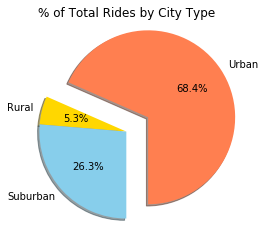

In [6]:
ride_total=Ride['ride_id'].sum()
ride_u=float((df.loc[df['type']=='Urban',['ride_id']].sum()))
ride_r=float((df.loc[df['type']=='Rural',['ride_id']].sum()))
ride_s=float((df.loc[df['type']=='Suburban',['ride_id']].sum()))
x = ["Urban", "Rural", "Suburban"]
y = [ride_u, ride_r, ride_s]
colors = ["coral", "gold", "skyblue"]
explode = (0.3, 0, 0)

plt.pie(y, labels=x, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=-90)
plt.title("% of Total Rides by City Type")
#plt.axis("equal")
plt.savefig("Pie_ride.png")
plt.show()


## Total Drivers by City Type

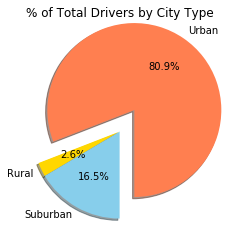

In [7]:
driver_total=City['driver_count'].sum()
dri_u=float((df.loc[df['type']=='Urban',['driver_count']].sum()))
dri_r=float((df.loc[df['type']=='Rural',['driver_count']].sum()))
dri_s=float((df.loc[df['type']=='Suburban',['driver_count']].sum()))
x = ["Urban", "Rural", "Suburban"]
y = [dri_u, dri_r, dri_s]
colors = ["coral", "gold", "skyblue"]
explode = (0.3, 0, 0)

plt.pie(y, labels=x, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=-90)
plt.title("% of Total Drivers by City Type")
#plt.axis("equal")
plt.savefig("Pie_driver.png")
plt.show()
